# Lesson 1. Open, Plot and Explore Lidar Data in Raster Format with Python

### https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


In [9]:
# Open raster data
lidar_dem = rio.open(
    'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

In [10]:
# Query the spatial extent of the data
lidar_dem.bounds

## BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

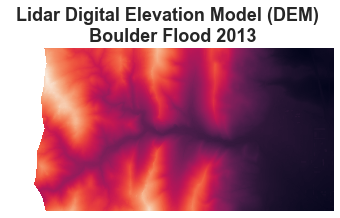

In [11]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()


# Opening and Closing File Connections

The rasterio library is efficient as it establishes a connection with the raster file rather than directly reading it into memory. Because it creates a connection, it is important that you close the connection after it is opened AND after you’ve finished working with the data!

RasterioIOError: Dataset is closed: data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif

## Once the connection is closed, you can no longer work with the data. You’ll need to re-open the connection. Like this:

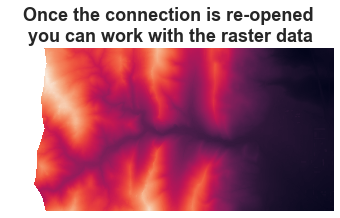

In [13]:
# Open raster data connection - again
lidar_dem = rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Once the connection is re-opened \nyou can work with the raster data", 
     ax=ax)
ax.set_axis_off()

In [15]:
lidar_dem.close()

# Context Manager to Open/Close Raster Data

A better way to work with raster data in rasterio is to use the context manager. This will handle opening and closing the raster file for you.

In [17]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.bounds)

## BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


### With a context manager, you create a connection to the file that you’d like to open. However, once your are outside of the with statement, that connection closes. Thus you don’t have to worry about opening and closing files using this syntax.

In [18]:
# Note that the src object is now closed
src

## <closed DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>


<closed DatasetReader name='data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>

# Raster Plots with Matplotlib

### To plot using matplotlib and EarthPy directly you:

1. open the raster
2. create a spatial_extent object that contains the boundary information needed to plot your        raster in space using rio.plot.plotting_extent
3.Read in the raster data itself into a numpy array using .read()

In [19]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read()
    # Create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    bounds = src.bounds


In [22]:
# This is the format that matplotlib wants
print("spatial extent:", spatial_extent)
# This is the format that rasterio provides with the bounds attribute
print("rasterio bounds:", bounds)

## spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
## rasterio bounds: BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


spatial extent: (472000.0, 476000.0, 4434000.0, 4436000.0)
rasterio bounds: BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


# Read Files with Rasterio into Numpy

In [23]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # convert / read the data into a numpy array: masked= True turns `nodata` values to nan
    lidar_dem_im = src.read(1, masked=True)
    # create a spatial extent object using rio.plot.plotting
    spatial_extent = rio.plot.plotting_extent(src)

print("object shape:", lidar_dem_im.shape)
print("object type:", type(lidar_dem_im))

## object shape: (2000, 4000)
## object type: <class 'numpy.ma.core.MaskedArray'>


object shape: (2000, 4000)
object type: <class 'numpy.ma.core.MaskedArray'>


In [24]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im2 = src.read(1)

with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im3 = src.read()

print("Array Shape Using read(1):", lidar_dem_im2.shape)
# Notice that without the (1), your numpy array has a third dimension
print("Array Shape Using read():", lidar_dem_im3.shape)

## Array Shape Using read(1): (2000, 4000)
## Array Shape Using read(): (1, 2000, 4000)


Array Shape Using read(1): (2000, 4000)
Array Shape Using read(): (1, 2000, 4000)


# Plot Numpy Array

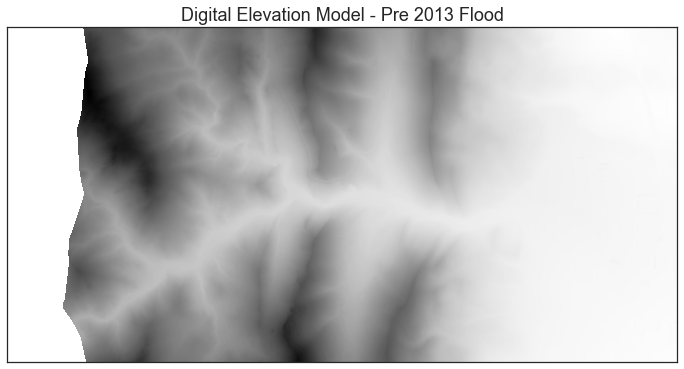

In [25]:
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=spatial_extent,
              title="Digital Elevation Model - Pre 2013 Flood",
              cbar=False)
plt.show()


# Let’s plot again but this time you will:

1. add a colorbar legend
2. increase the title font size using the as.set_title function and the fontsize argument

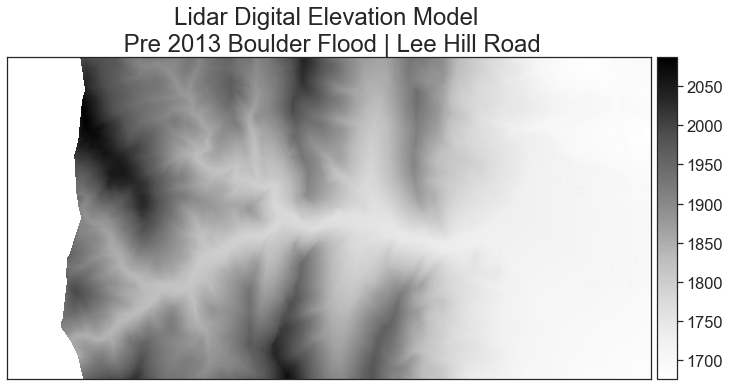

In [26]:
fig, ax = plt.subplots(figsize=(12, 10))
ep.plot_bands(lidar_dem_im,
              cmap='Greys',
              extent=spatial_extent,
              scale=False,
              ax=ax)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize=24)
plt.show()


# Explore Raster Data Values with Histograms

Next, you will explore a histogram of your data. A histogram is useful to help you better understand the distribution of values within your data. In this case given you are looking at elevation data, if there are all small elevation values and the histogram looks uniform (not too much variation in values) you can assume that your study area is relative “flat” - not too hilly. If there is a different distribution of elevation values you can begin to understand the range of elevation values in your study area and the degree of difference between low and high regions (i.e. is it flat or hilly?). Is it high elevation vs low elevation?

In [31]:
'''
lidar_dem_im

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)
'''

'\nlidar_dem_im\n\nmasked_array(\n  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,\n         1695.429931640625],\n        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,\n         1695.3599853515625],\n        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,\n         1695.3699951171875],\n        ...,\n        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],\n        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,\n         1681.5599365234375],\n        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,\n         1681.739990234375]],\n  mask=[[ True,  True,  True, ..., False, False, False],\n        [ True,  True,  True, ..., False, False, False],\n        [ True,  True,  True, ..., False, False, False],\n        ...,\n        [ True,  True,  True, ..., False, False, False],\n        [ True,  True,  True, ..., False, False, False],\n        [ True,  True,  True, ..., False, False, False]],\n  fill_value=-3.4028235e+38,\n 

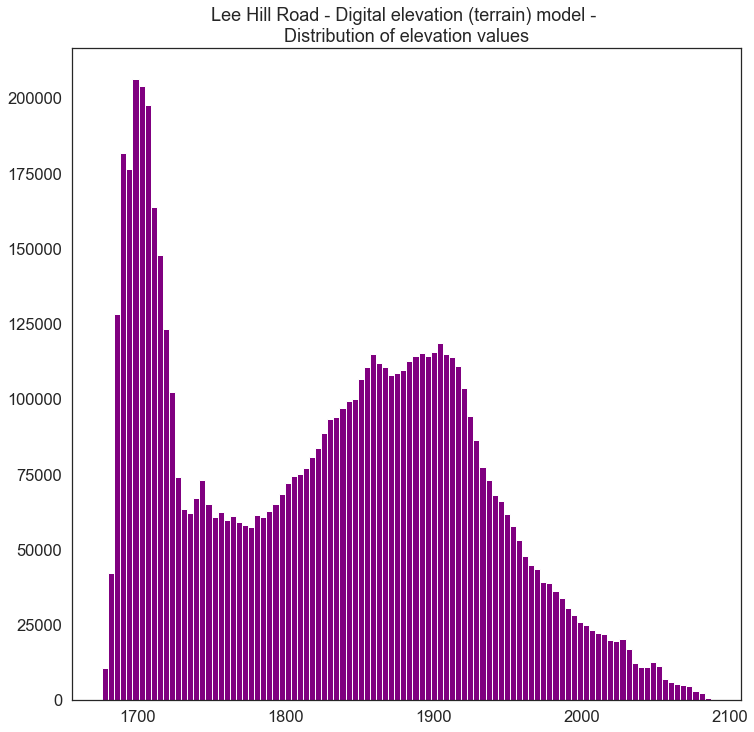

In [32]:
# Plot histogram
ep.hist(lidar_dem_im[~lidar_dem_im.mask].ravel(),
        bins=100,
        title="Lee Hill Road - Digital elevation (terrain) model - \nDistribution of elevation values")
plt.show()


# Adjust Plot Extent to “Zoom in” on Your Raster Data

If you want to quickly zoom in on a portion of your raster data, you can adjust the x and y spatial extents of your matplotlib plot. To do this, you will create a new spatial extent that is smaller than the original spatial extent of the data.

In [33]:
# Define a spatial extent that is "smaller"
# minx, miny, maxx, maxy, ccw=True
zoomed_extent = [472500, 4434000, 473030, 4435030]


# First define the 'box' indicating the area of zoom-focus

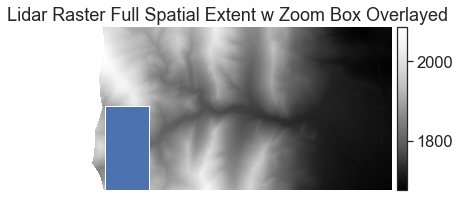

In [34]:
# Turn extent into geodataframe
zoom_ext_gdf = gpd.GeoDataFrame()
zoom_ext_gdf.loc[0, 'geometry'] = box(*zoomed_extent)

# Plot the original data with the boundary box
fig, ax = plt.subplots(figsize=(8, 3))
ep.plot_bands(lidar_dem_im,
              extent=spatial_extent,
              title="Lidar Raster Full Spatial Extent w Zoom Box Overlayed",
              ax=ax,
              scale=False)
zoom_ext_gdf.plot(ax=ax)

ax.set_axis_off()


# Now plot the zoomed area using matplotlib

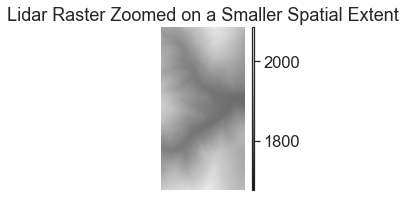

In [35]:
# Plot the data but set the x and y lim
fig, ax = plt.subplots(figsize=(8, 3))
ep.plot_bands(lidar_dem_im,
              extent=spatial_extent,
              title="Lidar Raster Zoomed on a Smaller Spatial Extent",
              ax=ax,
              scale=False)
# Set x and y limits of the plot
ax.set_xlim(zoomed_extent[0], zoomed_extent[2])
ax.set_ylim(zoomed_extent[1], zoomed_extent[3])
ax.set_axis_off()
plt.show()
